___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## MY APPROACH TO THIS PROJECT

The project requires me to predict a US army staff's self identified race based on given features. The two data frame (for males and females) mostly includes biometric measurements of soldiers. Since biometric measurements are expected to significantly vary by gender, I decided to develop two different models for predicting male and female soldiers's races. This way, I am expecting to simplify my models to some extend, reduce computational load and get better predictions.


# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# FEMALE DATA

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [215]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

#To display the plots
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

#!pip install xgboost
from xgboost import XGBClassifier

#!pip install yellowbrick
# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 


# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [198]:
female= pd.read_csv("ANSUR II FEMALE Public.csv")

In [199]:
female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

## Explore Data

In [200]:
pd.set_option('display.max_rows', None)

In [201]:
female.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectId,1986.0,22306.606244,20904.730297,10037.0,17667.00,22096.5,26089.75,920103.0
abdominalextensiondepthsitting,1986.0,229.651057,31.464691,155.0,207.00,227.0,249.00,358.0
acromialheight,1986.0,1335.095166,58.079885,1115.0,1298.00,1332.0,1374.00,1536.0
acromionradialelength,1986.0,311.198389,17.164691,249.0,300.00,311.0,323.00,371.0
anklecircumference,1986.0,215.739678,14.891757,170.0,205.00,215.0,225.00,275.0
axillaheight,1986.0,1239.029708,55.801958,1038.0,1202.00,1236.0,1277.00,1419.0
balloffootcircumference,1986.0,228.110272,11.771007,194.0,220.00,227.0,236.00,270.0
balloffootlength,1986.0,182.051360,9.641920,151.0,175.00,182.0,188.00,216.0
biacromialbreadth,1986.0,365.348943,18.298851,283.0,353.00,365.0,378.00,422.0
bicepscircumferenceflexed,1986.0,305.578550,30.757033,216.0,285.00,304.0,324.00,435.0


In [202]:
female.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    SubjectId                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [203]:
female_cat_features = list(female.select_dtypes(['object']).columns)
female_cat_features

['Gender',
 'Date',
 'Installation',
 'Component',
 'Branch',
 'PrimaryMOS',
 'SubjectsBirthLocation',
 'Ethnicity',
 'WritingPreference']

In [204]:
pd.set_option('display.max_rows', 20)

In [205]:
for i in female_cat_features:
    print("---------"*5)
    print(i)
    print("---------"*5)    
    print(female[i].value_counts(dropna=False).sort_values(ascending=False))


---------------------------------------------
Gender
---------------------------------------------
Female    1986
Name: Gender, dtype: int64
---------------------------------------------
Date
---------------------------------------------
5-Apr-12     44
28-Feb-12    43
15-Aug-11    33
8-Jun-11     33
7-Nov-11     31
             ..
29-Mar-12     2
7-Apr-11      2
12-Mar-12     1
9-Mar-11      1
14-Mar-12     1
Name: Date, Length: 127, dtype: int64
---------------------------------------------
Installation
---------------------------------------------
Fort Gordon       410
Camp Shelby       388
Fort Lee          380
Fort Bliss        197
Fort Stewart      122
Fort McCoy        115
Fort Bragg        104
Fort Huachuca      85
Fort Drum          74
Fort Hood          62
Camp Atterbury     49
Name: Installation, dtype: int64
---------------------------------------------
Component
---------------------------------------------
Regular Army           1020
Army National Guard     847
Army Reser

In [206]:
female["DODRace"] = female.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [207]:
female.groupby(["DODRace"])["Age"].describe()

# Age does not seem to be a factor in predicting race

,count,mean,std,min,25%,50%,75%,max
DODRace,,,,,,,,
Asian,71.0,28.633803,7.466572,18.0,22.00,28.0,34.50,47.0
Black,656.0,30.112805,8.711811,17.0,23.00,28.0,36.25,58.0
Hispanic,239.0,27.828452,7.707894,18.0,22.00,26.0,32.00,56.0
Native American,20.0,29.300000,8.909486,19.0,21.75,28.0,36.00,50.0
Pacific Islander,25.0,29.000000,7.438638,20.0,23.00,26.0,35.00,42.0
White,975.0,28.444103,8.217319,18.0,22.00,26.0,33.00,56.0


In [208]:
female.groupby(["DODRace"])["WritingPreference"].value_counts(normalize=True)

# Except for Pacific Islenders writing preferences does not seem to be a factor in predicting race. 
# Since I will be predicting Hispanic race group this feature will not be considered in my model.

DODRace           WritingPreference          
Asian             Right hand                     0.887324
                  Left hand                      0.112676
Black             Right hand                     0.893293
                  Left hand                      0.099085
                  Either hand (No preference)    0.007622
Hispanic          Right hand                     0.933054
                  Left hand                      0.066946
Native American   Right hand                     0.900000
                  Left hand                      0.100000
Pacific Islander  Right hand                     0.800000
                  Left hand                      0.200000
White             Right hand                     0.885128
                  Left hand                      0.096410
                  Either hand (No preference)    0.018462
Name: WritingPreference, dtype: float64

In [209]:
female.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace         
Army National Guard  White               0.573790
                     Black               0.277450
                     Hispanic            0.103896
                     Asian               0.024793
                     Native American     0.011806
                     Pacific Islander    0.008264
Army Reserve         White               0.386555
                     Black               0.361345
                     Hispanic            0.201681
                     Asian               0.033613
                     Native American     0.008403
                     Pacific Islander    0.008403
Regular Army         White               0.434314
                     Black               0.370588
                     Hispanic            0.124510
                     Asian               0.045098
                     Pacific Islander    0.016667
                     Native American     0.008824
Name: DODRace, dtype: float64

In [210]:
female.groupby(["Branch"])["DODRace"].value_counts(normalize=True)

# Analyses of component and branch features reveals no strong support for including these features in the model.

Branch                  DODRace         
Combat Arms             White               0.651163
                        Black               0.209302
                        Asian               0.069767
                        Hispanic            0.046512
                        Pacific Islander    0.023256
Combat Service Support  White               0.489650
                        Black               0.308917
                        Hispanic            0.140127
                        Asian               0.035032
                        Pacific Islander    0.014331
                        Native American     0.011943
Combat Support          White               0.483261
                        Black               0.377001
                        Hispanic            0.088792
                        Asian               0.034934
                        Pacific Islander    0.008734
                        Native American     0.007278
Name: DODRace, dtype: float64

In [219]:
# In addition to above anayses "subjectid", "SubjectBirthLocation" will be dropped fron the data frame since they have 
# nothing to do wit an individual's race.

# "SubjectNumericRace", "Ethnicity" are kind of duplicates of "DODRace", therefore they will be dropped as well.

# As my approach in this project proposes seperate analyses for male and female officers "Gender" will be dropped. 

# Hence the drop list will be as follows:

drop_list = ["SubjectId", "SubjectsBirthLocation", "SubjectNumericRace", "Ethnicity", "Gender", 
              "Age", "Heightin", "Weightlbs", "WritingPreference", "Date", "Installation", 
              "Component", "Branch", "PrimaryMOS"]

female.drop(columns= drop_list, inplace=True)

KeyError: "['SubjectId', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'Gender', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS'] not found in axis"

In [220]:
female.DODRace.value_counts()

White       975
Black       656
Hispanic    239
Name: DODRace, dtype: int64

In [217]:
# Since Asian, Pacific Islander and Native American categories do not have sufficient observation,
# the cases in these categories will be dropped.

female = female[(female["DODRace"] == "White") | (female["DODRace"] == "Black") | (female["DODRace"] == "Hispanic")]

<AxesSubplot:>

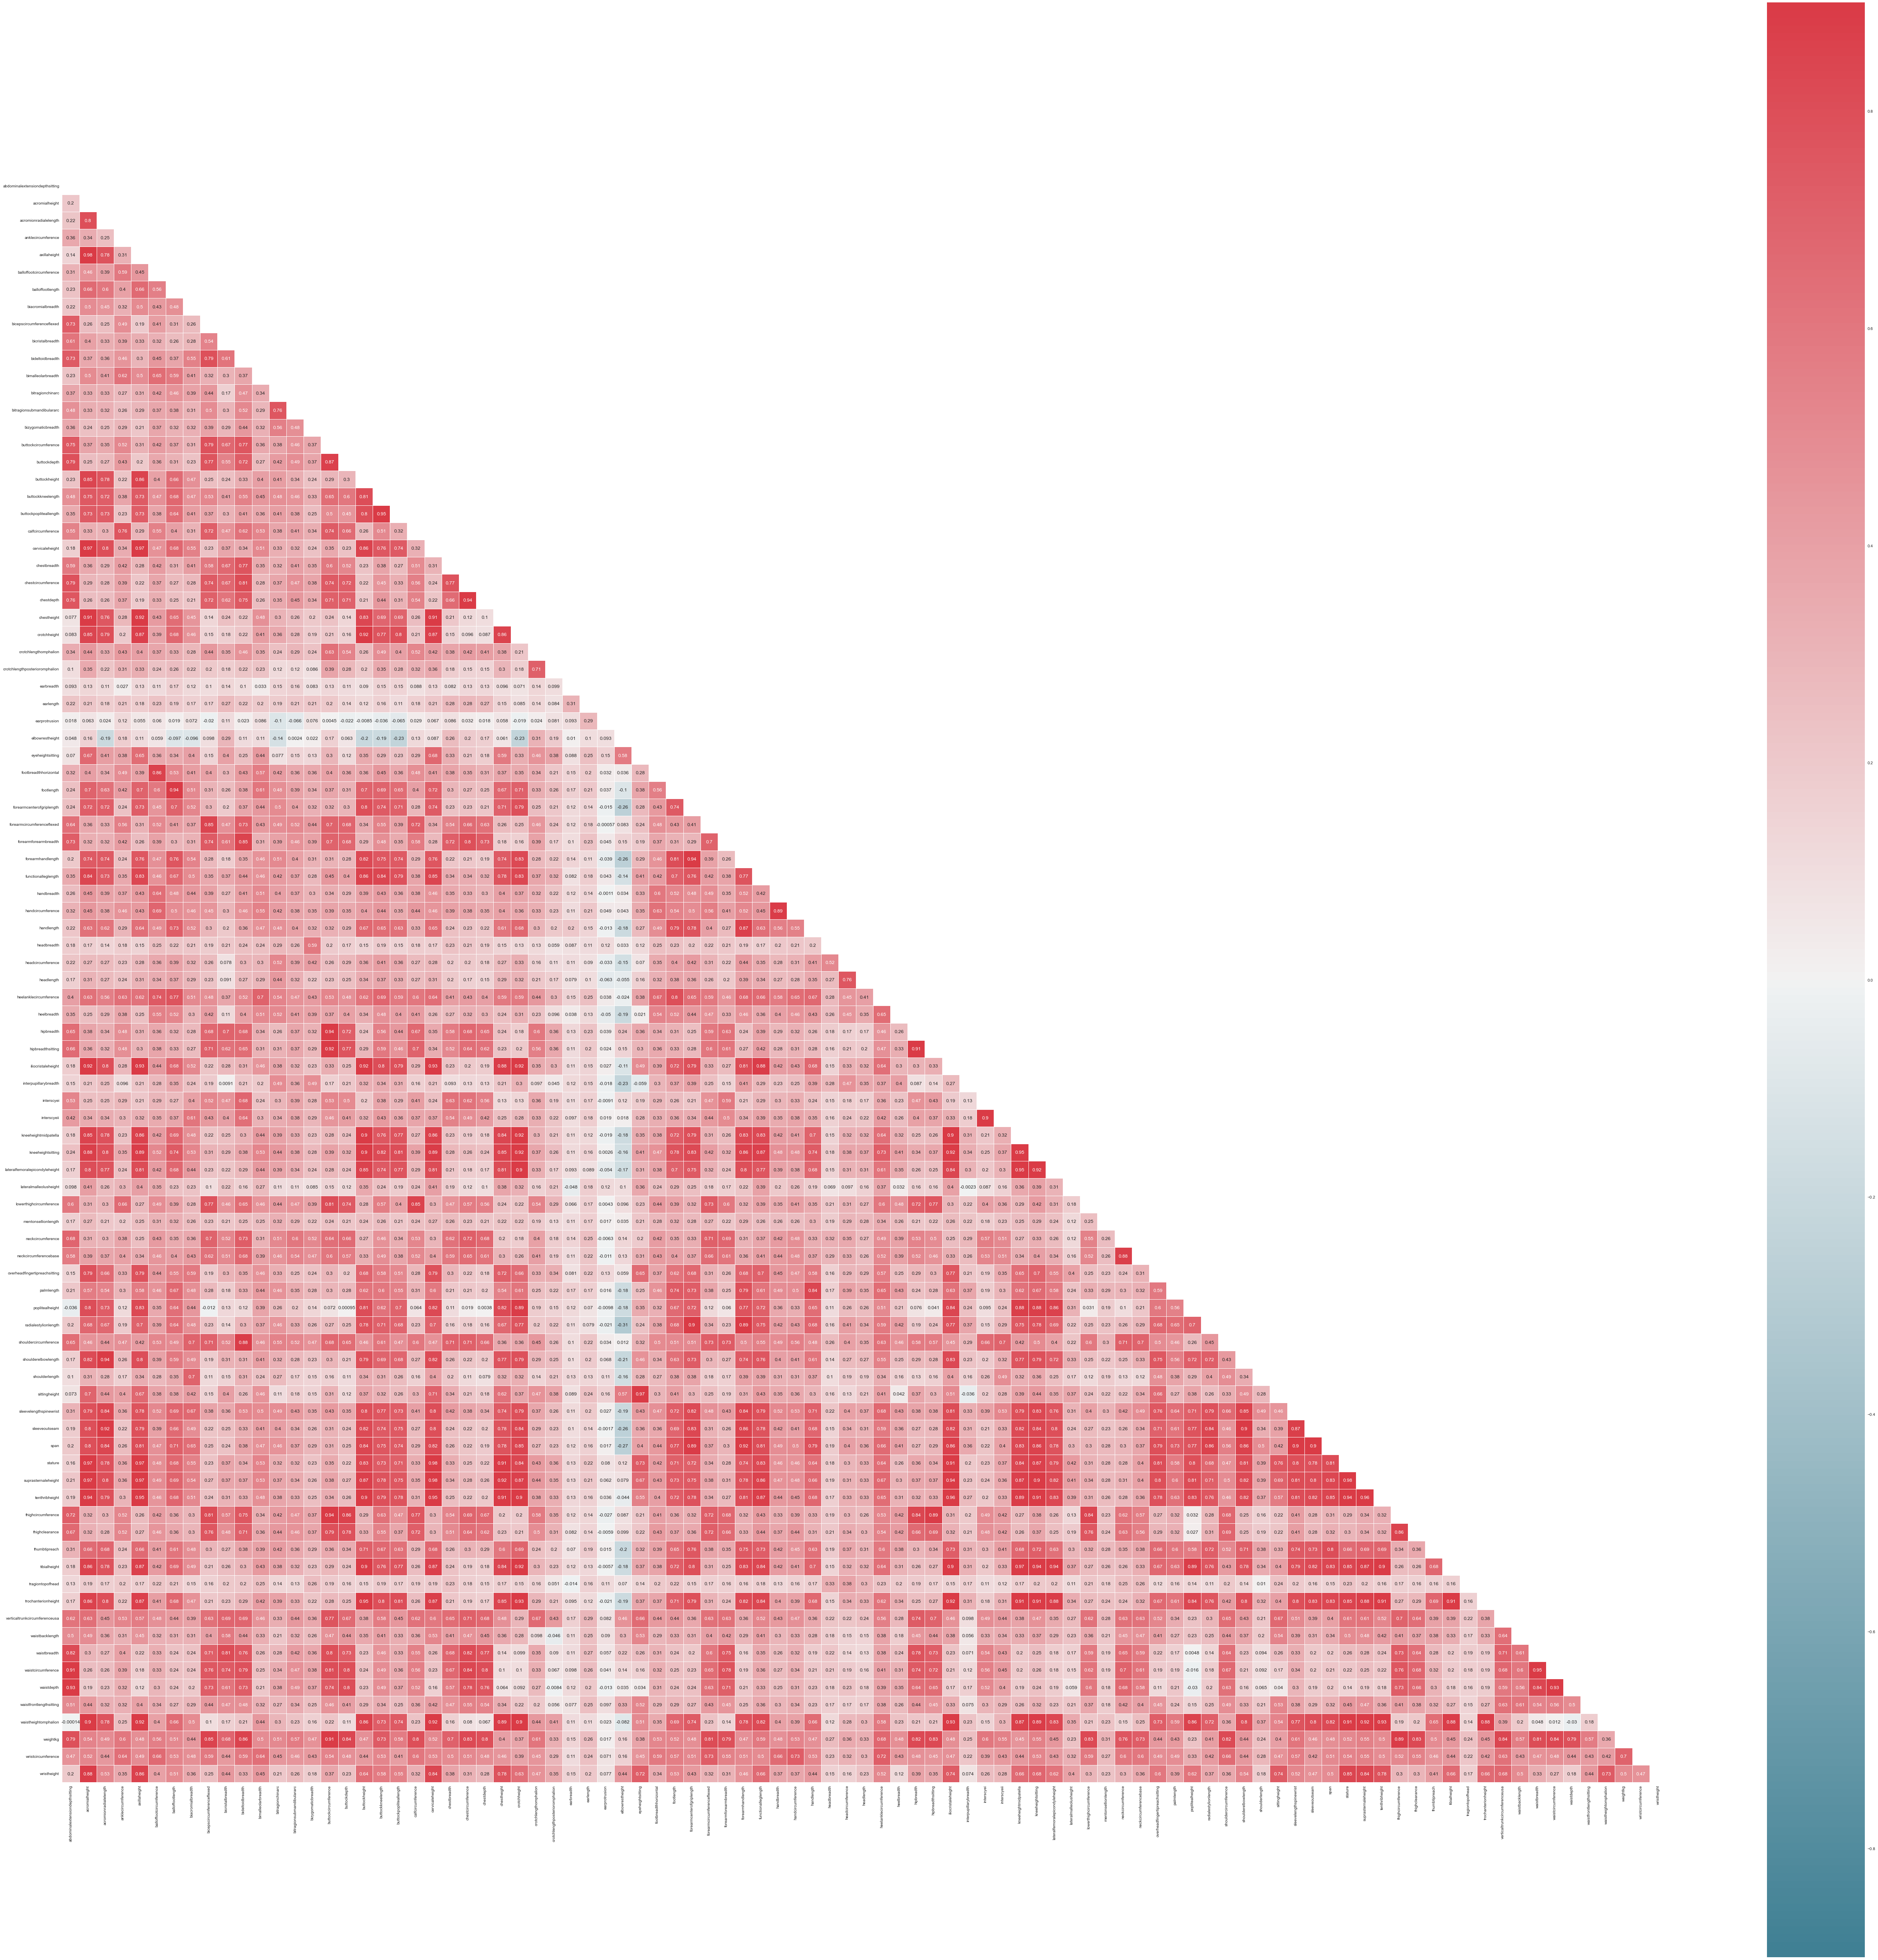

In [105]:
pd.set_option('display.max_rows', None)

corr = female.corr()

# Generate a mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(90, 90))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.9,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.9,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
)

In [224]:
def column_boxer1(col):
    fig = px.box(female,
                 color = "DODRace",
                 y= col)
    fig.show() 
cols = female.columns    
interact(column_boxer1,col = cols);

interactive(children=(Dropdown(description='col', options=('abdominalextensiondepthsitting', 'acromialheight',…

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [328]:
X = female.drop(columns= ["DODRace"])
y = female.DODRace

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify = y)

In [278]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (1496, 93)
Train target shape   :  (1496,)
Test features shape  :  (374, 93)
Test target shape    :  (374,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [279]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [280]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [281]:
from sklearn.pipeline import Pipeline
operations = [("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [282]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[116  13   2]
 [  4  32  12]
 [  4  32 159]]
              precision    recall  f1-score   support

       Black       0.94      0.89      0.91       131
    Hispanic       0.42      0.67      0.51        48
       White       0.92      0.82      0.86       195

    accuracy                           0.82       374
   macro avg       0.76      0.79      0.76       374
weighted avg       0.86      0.82      0.83       374


Train_Set
[[489  28   8]
 [  9 158  24]
 [ 12 112 656]]
              precision    recall  f1-score   support

       Black       0.96      0.93      0.94       525
    Hispanic       0.53      0.83      0.65       191
       White       0.95      0.84      0.89       780

    accuracy                           0.87      1496
   macro avg       0.81      0.87      0.83      1496
weighted avg       0.90      0.87      0.88      1496



In [283]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [287]:
operations = [("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.381114
train_precision_Hispanic    0.539670
test_recall_Hispanic        0.612632
train_recall_Hispanic       0.831868
test_f1_Hispanic            0.467052
train_f1_Hispanic           0.654574
dtype: float64

In [ ]:
# Vanilla Logistic Model does not seem to perform well in my approach. 
# Combined (male female) data that we studied in class works much better.

### Logistic Model GridsearchCV

In [285]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [286]:
param_grid = {
    "log__C": [0.5, 1],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [137]:
operations = [("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [139]:
log_model_grid.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [140]:
log_model_grid.best_estimator_

Pipeline(steps=[('log',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [142]:
log_model_grid.best_params_

{'log__C': 0.5, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [143]:
log_model_grid.best_index_

3

In [144]:
pd.DataFrame(log_model_grid.cv_results_).loc[7, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.592157
mean_train_score    0.843582
Name: 7, dtype: object

In [145]:
log_model_grid.best_score_

0.592156862745098

In [146]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[142  19   3]
 [  3  39  18]
 [  6  36 202]]
              precision    recall  f1-score   support

       Black       0.94      0.87      0.90       164
    Hispanic       0.41      0.65      0.51        60
       White       0.91      0.83      0.87       244

    accuracy                           0.82       468
   macro avg       0.75      0.78      0.76       468
weighted avg       0.86      0.82      0.83       468


Train_Set
[[455  30   7]
 [  8 151  20]
 [ 12  93 626]]
              precision    recall  f1-score   support

       Black       0.96      0.92      0.94       492
    Hispanic       0.55      0.84      0.67       179
       White       0.96      0.86      0.90       731

    accuracy                           0.88      1402
   macro avg       0.82      0.87      0.84      1402
weighted avg       0.91      0.88      0.89      1402



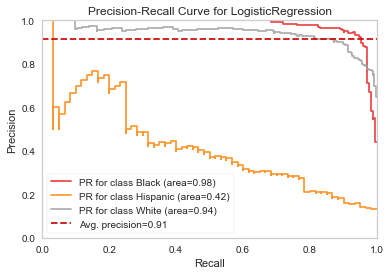

In [148]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

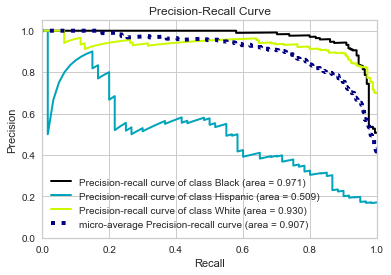

In [150]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [151]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.5091843530032655

In [152]:
viz.score_#["Hispanic"]

{'Black': 0.9773770885407851,
 'Hispanic': 0.42295655206846233,
 'White': 0.9418679859152044,
 'micro': 0.9137980821769708}

In [153]:
viz.score_["Hispanic"]

0.42295655206846233

In [158]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [159]:
log_AP

0.42295655206846233

In [160]:
log_f1

array([0.50649351])

In [161]:
log_recall

array([0.65])

In [ ]:
# Prediction power of Logistic Model GridsearchCV Model is weak as well. 

## 2. SVC

### Vanilla SVC model 

In [162]:
operations_svc = [("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

In [164]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[110  39  15]
 [  3  40  17]
 [ 28  87 129]]
              precision    recall  f1-score   support

       Black       0.78      0.67      0.72       164
    Hispanic       0.24      0.67      0.35        60
       White       0.80      0.53      0.64       244

    accuracy                           0.60       468
   macro avg       0.61      0.62      0.57       468
weighted avg       0.72      0.60      0.63       468


Train_Set
[[327 131  34]
 [ 21 112  46]
 [ 89 253 389]]
              precision    recall  f1-score   support

       Black       0.75      0.66      0.70       492
    Hispanic       0.23      0.63      0.33       179
       White       0.83      0.53      0.65       731

    accuracy                           0.59      1402
   macro avg       0.60      0.61      0.56      1402
weighted avg       0.72      0.59      0.63      1402



In [165]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.221036
train_precision_Hispanic    0.225385
test_recall_Hispanic        0.610131
train_recall_Hispanic       0.619504
test_f1_Hispanic            0.323455
train_f1_Hispanic           0.330491
dtype: float64

In [ ]:
# SVC Model has the worst performance so far. 

###  SVC Model GridsearchCV

In [166]:
param_grid = {
    'svc__C': [0.5, 1],
    'svc__gamma': ["scale", "auto", 0.01]
}

In [168]:
operations_svc = [("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True)

In [169]:
svm_model_grid.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [170]:
svm_model_grid.best_estimator_

Pipeline(steps=[('svc', SVC(C=0.5, class_weight='balanced', random_state=101))])

In [171]:
svm_model_grid.best_params_

{'svc__C': 0.5, 'svc__gamma': 'scale'}

In [172]:
svm_model_grid.best_index_

0

In [173]:
pd.DataFrame(svm_model_grid.cv_results_).loc[3, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.610131
mean_train_score    0.619504
Name: 3, dtype: object

In [174]:
svm_model_grid.best_score_

0.6326797385620915

In [175]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[100  43  21]
 [  4  41  15]
 [ 51  97  96]]
              precision    recall  f1-score   support

       Black       0.65      0.61      0.63       164
    Hispanic       0.23      0.68      0.34        60
       White       0.73      0.39      0.51       244

    accuracy                           0.51       468
   macro avg       0.53      0.56      0.49       468
weighted avg       0.63      0.51      0.53       468


Train_Set
[[305 144  43]
 [ 21 115  43]
 [114 275 342]]
              precision    recall  f1-score   support

       Black       0.69      0.62      0.65       492
    Hispanic       0.22      0.64      0.32       179
       White       0.80      0.47      0.59       731

    accuracy                           0.54      1402
   macro avg       0.57      0.58      0.52      1402
weighted avg       0.69      0.54      0.58      1402



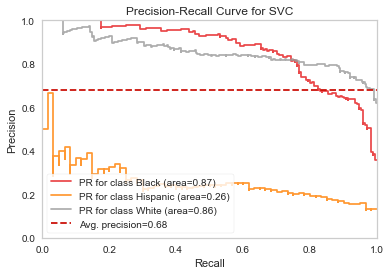

In [177]:
operations_svc = [("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

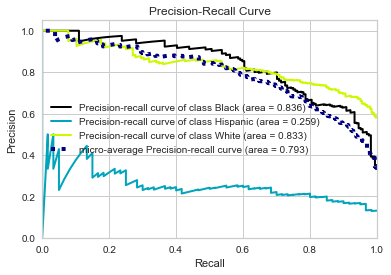

In [179]:
operations = [("svc", SVC(C=1, class_weight="balanced",random_state=101, probability=True))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

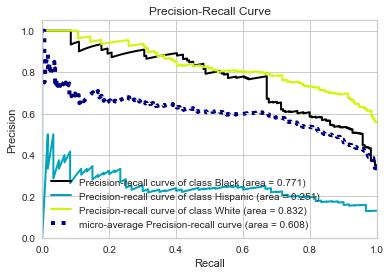

In [181]:
operations = [("svc", SVC(C=1, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

#y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, decision_function)
plt.show();

In [182]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [ ]:
# The resuls from SVC Model GridsearchCV does not show any improvement.

## 3. RF

### Vanilla RF Model

In [288]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [289]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[113   0  18]
 [  3   6  39]
 [  5   4 186]]
              precision    recall  f1-score   support

       Black       0.93      0.86      0.90       131
    Hispanic       0.60      0.12      0.21        48
       White       0.77      0.95      0.85       195

    accuracy                           0.82       374
   macro avg       0.77      0.65      0.65       374
weighted avg       0.80      0.82      0.78       374


Train_Set
[[525   0   0]
 [  0 191   0]
 [  0   0 780]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       525
    Hispanic       1.00      1.00      1.00       191
       White       1.00      1.00      1.00       780

    accuracy                           1.00      1496
   macro avg       1.00      1.00      1.00      1496
weighted avg       1.00      1.00      1.00      1496



In [290]:
operations_rf = [("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.602381
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.089204
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.154015
train_f1_Hispanic           1.000000
dtype: float64

In [ ]:
# Vanilla RF Model gives the best prediction results for Hispanics so far.

### RF Model GridsearchCV

In [291]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [293]:
operations_rf = [("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1,
                             return_train_score=True)

In [294]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [295]:
rf_grid_model.best_estimator_

Pipeline(steps=[('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [296]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [297]:
rf_grid_model.best_index_

0

In [298]:
pd.DataFrame(rf_grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.533198
mean_train_score    0.585019
Name: 0, dtype: object

In [299]:
rf_grid_model.best_score_

0.5331983805668016

In [300]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 89  28  14]
 [  2  33  13]
 [ 39  53 103]]
              precision    recall  f1-score   support

       Black       0.68      0.68      0.68       131
    Hispanic       0.29      0.69      0.41        48
       White       0.79      0.53      0.63       195

    accuracy                           0.60       374
   macro avg       0.59      0.63      0.57       374
weighted avg       0.69      0.60      0.62       374


Train_Set
[[392 102  31]
 [ 30 114  47]
 [111 201 468]]
              precision    recall  f1-score   support

       Black       0.74      0.75      0.74       525
    Hispanic       0.27      0.60      0.38       191
       White       0.86      0.60      0.71       780

    accuracy                           0.65      1496
   macro avg       0.62      0.65      0.61      1496
weighted avg       0.74      0.65      0.68      1496



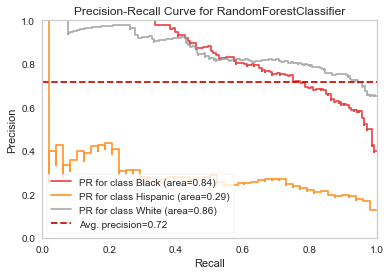

In [302]:
operations_rf = [ ("RF_model", RandomForestClassifier(class_weight="balanced", max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [303]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [ ]:
# The prediction power of RF Model Gridsearch is still low- for Hispanics but these are the best scores so far.

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
X = female.drop(columns= ["DODRace"])
y = female.DODRace

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify = y)

In [344]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test) 

In [332]:
operations_xgb = [("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               o

In [340]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.63931624, 2.61082024, 0.94984127, ..., 2.61082024, 0.94984127,
       0.94984127])

In [341]:
comp = pd.DataFrame(classes_weights, columns=["weights"])

comp["label"] = y_train
comp.head()

,weights,label
0,0.639316,2
1,2.610820,1
2,0.949841,0
3,0.949841,0
4,0.639316,2


In [342]:
comp.groupby("label")["weights"].value_counts()

label  weights 
0      0.949841    525
1      2.610820    191
2      0.639316    780
Name: weights, dtype: int64

In [343]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               o

In [345]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[116   5  10]
 [  2  19  27]
 [  5   9 181]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       131
           1       0.58      0.40      0.47        48
           2       0.83      0.93      0.88       195

    accuracy                           0.84       374
   macro avg       0.78      0.74      0.75       374
weighted avg       0.84      0.84      0.84       374


Train_Set
[[525   0   0]
 [  0 191   0]
 [  0   0 780]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       191
           2       1.00      1.00      1.00       780

    accuracy                           1.00      1496
   macro avg       1.00      1.00      1.00      1496
weighted avg       1.00      1.00      1.00      1496



### XGBoost Model GridsearchCV

In [350]:
param_grid = {"XGB_model__n_estimators":[20, 40],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.03, 0.05],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [351]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic,
                              cv=5,
                              n_jobs = -1,
                              return_train_score=True)

In [352]:
xgb_grid_model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index([], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=Non

In [353]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index([], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.8, early_stopp...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.03,
                               max_bin=256, max_cat_threshold=64,
                          

In [354]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.03,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 20,
 'XGB_model__subsample': 0.8}

In [355]:
xgb_grid_model.best_index_

0

In [356]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[12, ["mean_test_score", "mean_train_score"]]

mean_test_score     NaN
mean_train_score    NaN
Name: 12, dtype: object

In [357]:
xgb_grid_model.best_score_

nan

In [358]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[90 25 16]
 [ 5 30 13]
 [42 60 93]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       131
           1       0.26      0.62      0.37        48
           2       0.76      0.48      0.59       195

    accuracy                           0.57       374
   macro avg       0.56      0.60      0.54       374
weighted avg       0.66      0.57      0.59       374


Train_Set
[[381 104  40]
 [ 31 117  43]
 [111 222 447]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       525
           1       0.26      0.61      0.37       191
           2       0.84      0.57      0.68       780

    accuracy                           0.63      1496
   macro avg       0.61      0.64      0.59      1496
weighted avg       0.73      0.63      0.66      1496



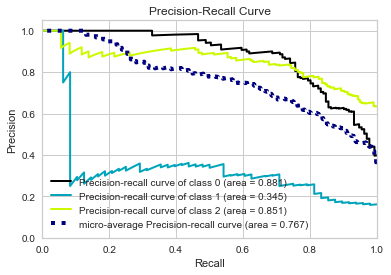

In [359]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(colsample_bytree=0.8, learning_rate=0.05, 
                                            max_depth=2, n_estimators=20, objective='multi:softprob', random_state=101,
                                            subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [360]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.3452313436809602

In [361]:
y_test_dummies

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [362]:
y_pred_proba

array([[0.2559481 , 0.26795313, 0.47609872],
       [0.2370235 , 0.32722536, 0.4357512 ],
       [0.35299397, 0.33284065, 0.31416538],
       ...,
       [0.29422402, 0.43274942, 0.2730266 ],
       [0.46251225, 0.2219463 , 0.31554145],
       [0.19790626, 0.28633896, 0.51575476]], dtype=float32)

# MALE DATA

In [367]:
male = pd.read_csv("ANSUR II MALE Public.csv", encoding="Latin1")
male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [369]:
drop_list = ["subjectid", "SubjectsBirthLocation", "SubjectNumericRace", "Ethnicity", "Gender", 
              "Age", "Heightin", "Weightlbs", "WritingPreference", "Date", "Installation", 
              "Component", "Branch", "PrimaryMOS"]

male.drop(columns= drop_list, inplace=True)

In [372]:
male["DODRace"] = male.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})
male.DODRace.value_counts()

White               2817
Black                642
Hispanic             440
Asian                117
Pacific Islander      34
Native American       29
Other                  3
Name: DODRace, dtype: int64

In [373]:
male = male[(male["DODRace"] == "White") | (male["DODRace"] == "Black") | (male["DODRace"] == "Hispanic")]
male

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,DODRace
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,White
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,White
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Black
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,White
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,235,1353,312,

In [374]:
X = male.drop(columns= ["DODRace"])
y = male.DODRace

In [375]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify = y)

# Vanilla Logistic Model

In [376]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [377]:
cat = X_train.select_dtypes("object").columns
cat 

Index([], dtype='object')

In [378]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [379]:
from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [380]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[121   5   2]
 [  9  55  24]
 [ 16 120 428]]
              precision    recall  f1-score   support

       Black       0.83      0.95      0.88       128
    Hispanic       0.31      0.62      0.41        88
       White       0.94      0.76      0.84       564

    accuracy                           0.77       780
   macro avg       0.69      0.78      0.71       780
weighted avg       0.85      0.77      0.80       780


Train_Set
[[ 475   24   15]
 [  26  264   62]
 [  58  385 1810]]
              precision    recall  f1-score   support

       Black       0.85      0.92      0.89       514
    Hispanic       0.39      0.75      0.52       352
       White       0.96      0.80      0.87      2253

    accuracy                           0.82      3119
   macro avg       0.73      0.83      0.76      3119
weighted avg       0.88      0.82      0.84      3119



In [381]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

In [382]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.351616
train_precision_Hispanic    0.390827
test_recall_Hispanic        0.690079
train_recall_Hispanic       0.748420
test_f1_Hispanic            0.465221
train_f1_Hispanic           0.513475
dtype: float64

# Vanilla RF Model

In [383]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [384]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index([], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [385]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[ 75   0  53]
 [  2   1  85]
 [  3   0 561]]
              precision    recall  f1-score   support

       Black       0.94      0.59      0.72       128
    Hispanic       1.00      0.01      0.02        88
       White       0.80      0.99      0.89       564

    accuracy                           0.82       780
   macro avg       0.91      0.53      0.54       780
weighted avg       0.85      0.82      0.76       780


Train_Set
[[ 514    0    0]
 [   0  352    0]
 [   0    0 2253]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       514
    Hispanic       1.00      1.00      1.00       352
       White       1.00      1.00      1.00      2253

    accuracy                           1.00      3119
   macro avg       1.00      1.00      1.00      3119
weighted avg       1.00      1.00      1.00      3119



In [386]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.642857
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.031268
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.058781
train_f1_Hispanic           1.000000
dtype: float64

# Conclusion

In [ ]:
# Developing seperate models for females and males did not reveal better models compared to the combined data.
# working with the whole data and including gender as a feature seems to reveal better models.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___